## Import libraries

In [51]:
import pandas as pd
import numpy as np
import plotly.express as px

##Download the dataset

In [46]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv'
df = pd.read_csv(url)

In [4]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


##The goal is to visualize historically the number of accidents per category

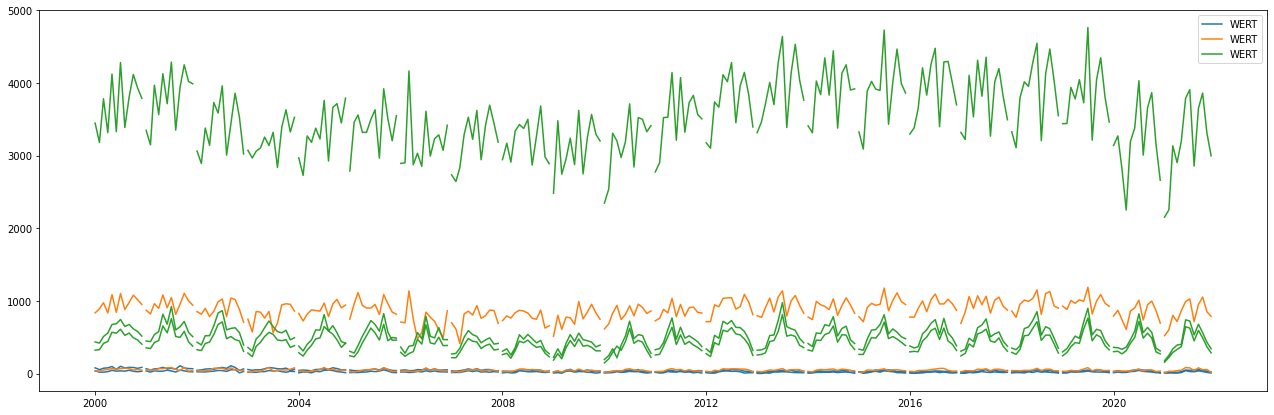

In [45]:
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')
plt.figure(figsize=(22,7))
plt.plot('MONAT_DATETIME','WERT',data=df[df['MONATSZAHL']=='Alkoholunfälle'])
plt.plot('MONAT_DATETIME','WERT',data=df[df['MONATSZAHL']=='Fluchtunfälle'])
plt.plot('MONAT_DATETIME','WERT',data=df[df['MONATSZAHL']=='Verkehrsunfälle'])
plt.legend(loc='best')
plt.show()


In [49]:
# Visualize a monthly dependence
df.JAHR.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000])

In [37]:
df.MONATSZAHL.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

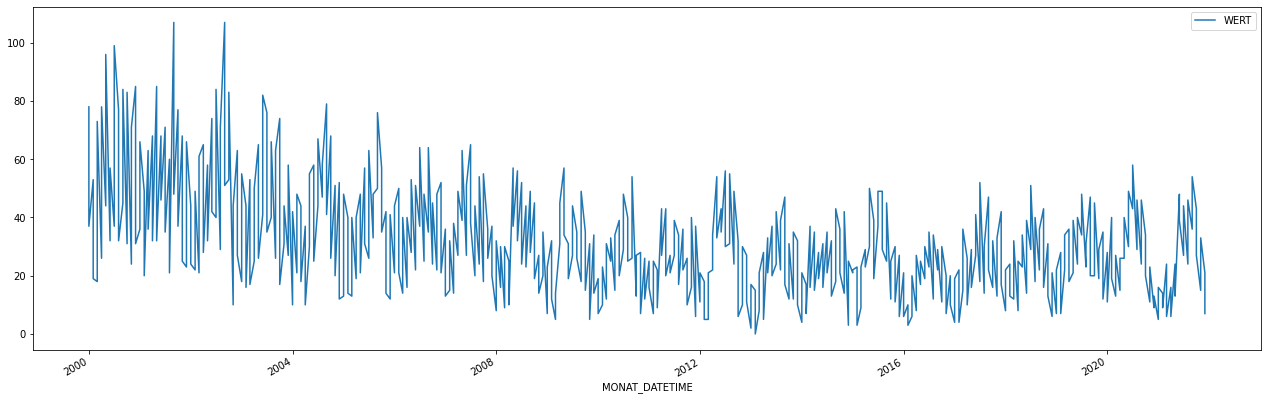

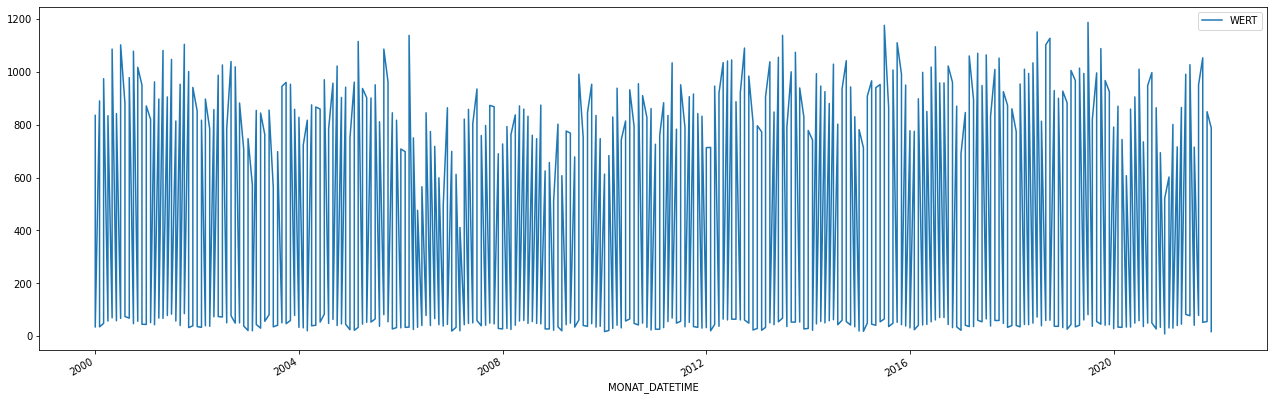

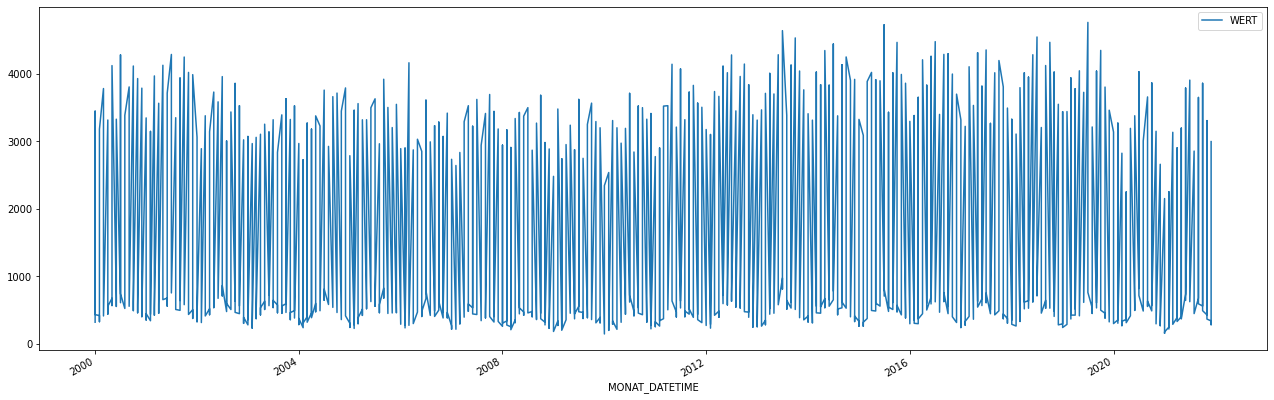

In [38]:

fig = px.imshow(df[df.MONAT == 'Summe'].sort_values(by='JAHR'), x="JAHR", y="WERT", color='MONATSZAHL',markers=True)
fig.show()

In [64]:

fig = px.line(df[df.MONAT == 'Summe'].sort_values(by='JAHR',ascending=True), x="JAHR", y="WERT", color='MONATSZAHL',markers=True)
fig.show()